# 場景理解

明星、冠軍隊伍

# 資料讀取

In [271]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass

warnings.warn = ignore_warn

from scipy import stats
from scipy.stats import norm, skew

pd.set_option('display.float_format',lambda x:'{:.3f}'.format(x))

In [272]:
train_data = pd.read_csv('train.csv')

In [273]:
test_data = pd.read_csv('test.csv')

# 初步評估資料

In [274]:
train_data.head()

,id,playerID,yearID,stint,teamID,lgID,W,L,G,GS,...,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,salary_next_year
0,0,nelsoge01,1986,1,CHA,AL,6,6,54,1,...,3.000,3.000,0.000,488.000,26.000,52,nan,nan,nan,365000.000
1,1,moyerja01,1997,1,SEA,AL,17,5,30,30,...,3.000,7.000,0.000,787.000,0.000,82,nan,nan,nan,2000000.000
2,2,thompbr01,2008,1,SLN,NL,6,3,26,6,...,2.000,3.000,0.000,273.000,10.000,38,nan,nan,nan,650000.000
3,3,powerte01,1986,1,CIN,NL,10,6,56,10,...,5.000,1.000,1.000,537.000,30.000,59,nan,nan,nan,500000.000
4,4,osunaan01,2003,1,NYA,AL,2,5,48,0,...,3.000,2.000,0.000,232.000,16.000,22,nan,nan,nan,750000.000


In [275]:
test_data.head()

,id,playerID,yearID,stint,teamID,lgID,W,L,G,GS,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,6284,cormirh01,2000,1,BOS,AL,3,3,64,0,...,2.000,1.000,0.000,0.000,293.000,12.000,40,nan,nan,nan
1,6285,reyesde01,2003,1,PIT,NL,0,0,12,0,...,1.000,5.000,0.000,0.000,50.000,4.000,13,nan,nan,nan
2,6286,runyase01,1999,1,DET,AL,0,1,12,0,...,1.000,2.000,1.000,0.000,45.000,2.000,4,nan,nan,nan
3,6287,byrdpa01,2002,1,KCA,AL,17,11,33,33,...,1.000,3.000,7.000,1.000,935.000,0.000,111,nan,nan,nan
4,6288,parkch01,2006,1,SDN,NL,7,7,24,21,...,7.000,5.000,10.000,0.000,606.000,0.000,81,nan,nan,nan


In [276]:
train_data.shape

(6284, 32)

In [277]:
test_data.shape

(1109, 31)

In [278]:
train_data.info() 
# BAOpp 有一半都沒有值, SH、SF、GIDP全部都沒有值
#直接 drop掉SH、SF、GIDP

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6284 entries, 0 to 6283
Data columns (total 32 columns):
id                  6284 non-null int64
playerID            6284 non-null object
yearID              6284 non-null int64
stint               6284 non-null int64
teamID              6284 non-null object
lgID                6284 non-null object
W                   6284 non-null int64
L                   6284 non-null int64
G                   6284 non-null int64
GS                  6284 non-null int64
CG                  6284 non-null int64
SHO                 6284 non-null int64
SV                  6284 non-null int64
IPouts              6284 non-null int64
H                   6284 non-null int64
ER                  6284 non-null int64
HR                  6284 non-null int64
BB                  6284 non-null int64
SO                  6284 non-null int64
BAOpp               3831 non-null float64
ERA                 6284 non-null float64
IBB                 6284 non-null float64
WP  

In [279]:
test_data.info() #測試集的資料缺失跟訓練集資料分不一致

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1109 entries, 0 to 1108
Data columns (total 31 columns):
id          1109 non-null int64
playerID    1109 non-null object
yearID      1109 non-null int64
stint       1109 non-null int64
teamID      1109 non-null object
lgID        1109 non-null object
W           1109 non-null int64
L           1109 non-null int64
G           1109 non-null int64
GS          1109 non-null int64
CG          1109 non-null int64
SHO         1109 non-null int64
SV          1109 non-null int64
IPouts      1109 non-null int64
H           1109 non-null int64
ER          1109 non-null int64
HR          1109 non-null int64
BB          1109 non-null int64
SO          1109 non-null int64
BAOpp       675 non-null float64
ERA         1109 non-null float64
IBB         1108 non-null float64
WP          1108 non-null float64
HBP         1108 non-null float64
BK          1108 non-null float64
BFP         1109 non-null float64
GF          1109 non-null float64
R          

In [280]:
train_data.describe()

,id,yearID,stint,W,L,G,GS,CG,SHO,SV,...,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,salary_next_year
count,6284.000,6284.000,6284.000,6284.000,6284.000,6284.000,6284.000,6284.000,6284.000,6284.000,...,6284.000,6284.000,6284.000,6284.000,6284.000,6284.000,0.000,0.000,0.000,6284.000
mean,3141.500,1998.681,1.004,6.270,5.840,37.204,12.518,0.960,0.305,3.327,...,3.565,3.382,0.579,452.330,10.065,52.188,nan,nan,nan,2153669.017
std,1814.179,7.293,0.067,5.082,4.151,19.697,13.538,2.051,0.763,8.768,...,3.201,3.159,1.126,288.615,14.960,34.497,nan,nan,nan,2990284.701
min,0.000,1985.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,1.000,0.000,0.000,nan,nan,nan,60000.000
25%,1570.750,1993.000,1.000,2.000,2.000,24.000,0.000,0.000,0.000,0.000,...,1.000,1.000,0.000,229.000,0.000,24.000,nan,nan,nan,350000.000
50%,3141.500,1999.000,1.000,5.000,5.000,33.000,6.000,0.000,0.000,0.000,...,3.000,3.000,0.000,349.000,3.000,41.000,nan,nan,nan,875000.000
75%,4712.250,2005.000,1.000,10.000,9.000,52.000,27.000,1.000,0.000,1.000,...,5.000,5.000,1.000,721.000,14.000,82.000,nan,nan,nan,2788541.500
max,6283.000,2011.000,2.000,27.000,21.000,94.000,39.000,20.000,10.000,62.000,...,26.000,20.000,16.000,1157.000,76.000,160.000,nan,nan,nan,24285714.000


In [281]:
train_data.describe(include = 'object')

,playerID,teamID,lgID
count,6284,6284,6284
unique,1246,34,2
top,moyerja01,PIT,NL
freq,22,244,3254


> playerID怎麼處理?

## 訓練數據跟測試數據結合

In [282]:
train_ID =  train_data['id']
test_ID = test_data['id']

train_data.drop(['id'], axis = 1,inplace = True)
test_data.drop(['id'], axis = 1, inplace = True)

print("訓練資料集的維度",train_data.shape)
print("測試資料集的維度",test_data.shape)

訓練資料集的維度 (6284, 31)
測試資料集的維度 (1109, 30)


# 探索式數據分析

## BAOpp:對手平均打擊率 缺失39%數據

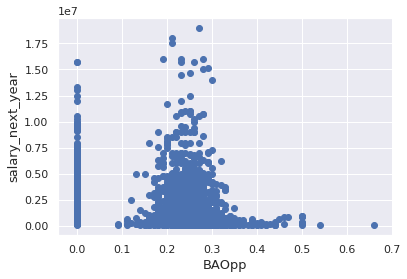

In [283]:
#繪圖
fig, ax = plt.subplots()
ax.scatter(x = train_data['BAOpp'], y = train_data['salary_next_year'])
plt.ylabel('salary_next_year', fontsize = 13)
plt.xlabel('BAOpp', fontsize = 13)
plt.show()

## 觀看所有資料的

In [284]:
# pairplot of numerical variables
#sns.pairplot(data=all_data)

# 畫出熱力圖比較特徵間的相關性

In [285]:
# Required parameter: dataframe ... the reference pandas dataframe
# Optional parameters: title ... (string) chart title
#                      file  ... (string) path+filename if you want to save image
def half_masked_corr_heatmap(dataframe, title=None, file=None):
    plt.figure(figsize=(15,15))
    sns.set(font_scale=1)

    mask = np.zeros_like(dataframe.corr())
    mask[np.triu_indices_from(mask)] = True

    with sns.axes_style("white"):
        sns.heatmap(dataframe.corr(), mask=mask, annot=True, cmap='coolwarm')

    if title: plt.title(f'\n{title}\n', fontsize=18)
    plt.xlabel('')    # optional in case you want an x-axis label
    plt.ylabel('')    # optional in case you want a  y-axis label
    if file: plt.savefig(file, bbox_inches='tight')
    plt.show();
    
    return

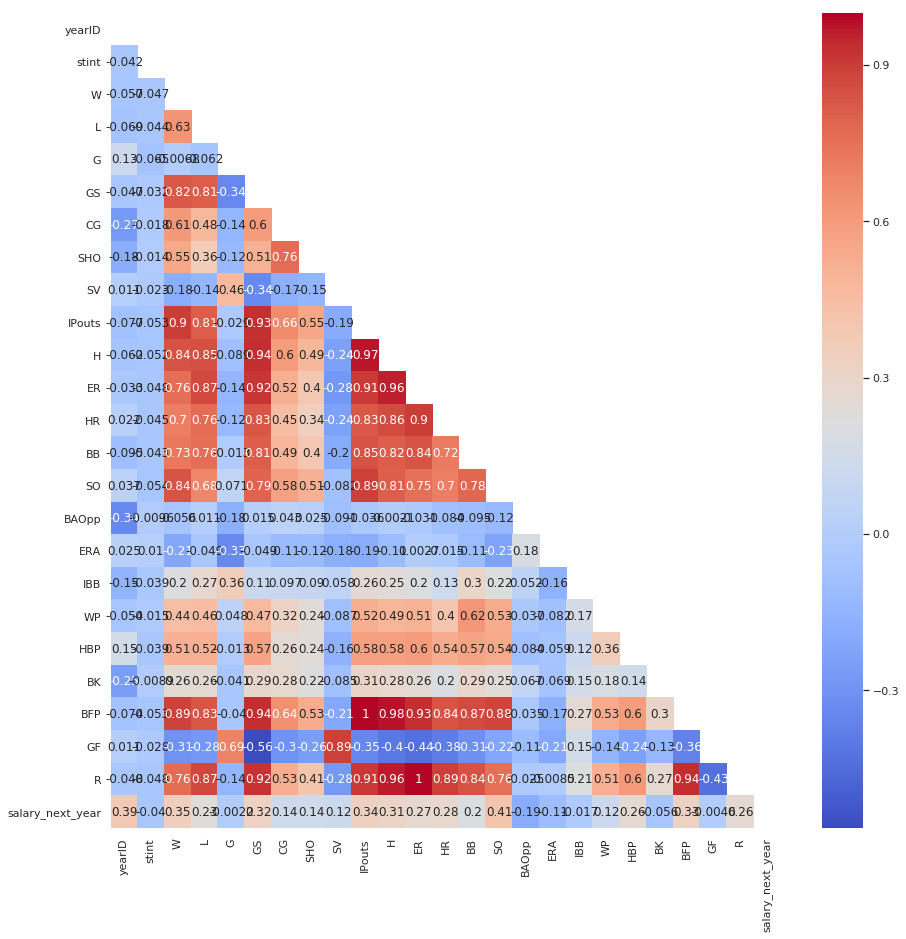

In [286]:
half_masked_corr_heatmap(train_data.drop(['SH','SF','GIDP'],axis = 1))

In [287]:
# Required parameters: dataframe ... the reference pandas dataframe
#                      target ... (string) column name of the target variable

# Optional parameters: title ... (string) chart title
#                      file  ... (string) path+filename if you want to save image

def corr_to_target(dataframe, target, title=None, file=None):
    plt.figure(figsize=(4,6))
    sns.set(font_scale=1)
    
    sns.heatmap(dataframe.corr()[[target]].sort_values(target,
                                                ascending=False)[1:],
                annot=True,
                cmap='coolwarm')
    
    if title: plt.title(f'\n{title}\n', fontsize=18)
    plt.xlabel('')    # optional in case you want an x-axis label
    plt.ylabel('')    # optional in case you want a  y-axis label
    if file: plt.savefig(file, bbox_inches='tight')
    plt.show();
    
    return

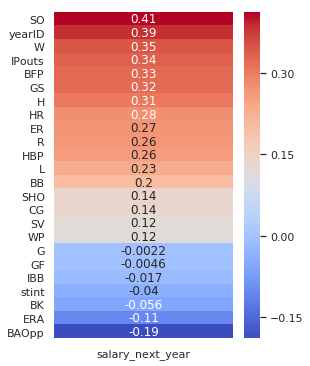

In [288]:
corr_to_target(train_data.drop(['SH','SF','GIDP'],axis = 1), 'salary_next_year') #可以看到薪資跟年代高度相關，以前的薪水跟現在的薪水不一樣

### 觀察YearID與薪資的趨勢

> 1994年聽說罷工所以停止舉辦冠軍賽 感覺與這有關

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


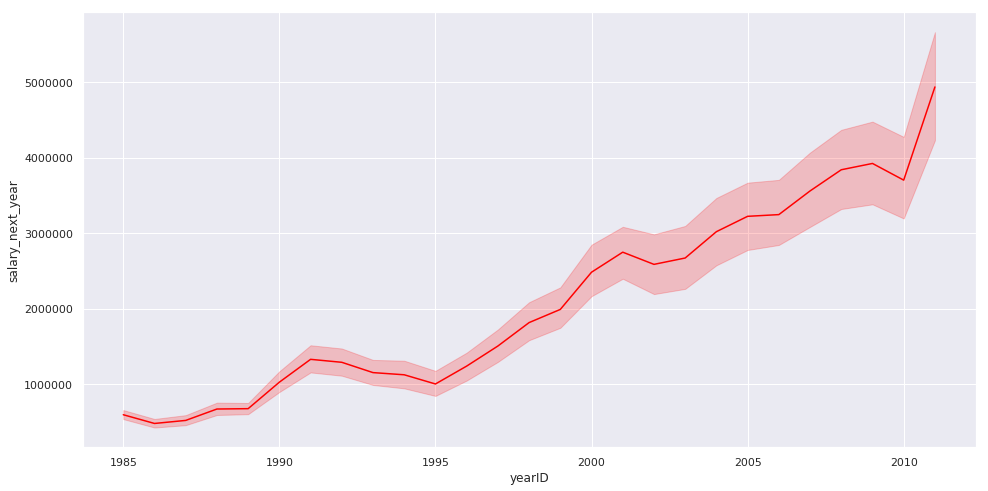

In [289]:
f, ax = plt.subplots(figsize=(16, 8)) #考慮把1994的數據拿掉
sns.lineplot(x='yearID', y='salary_next_year', data=train_data,color = 'red') #可發現從1995年以後薪資是一路成長, 且可以用五年用一個單位

### 觀察playID 出現的次數 增加個表現的平均值 等等、同時觀察有無名星球員的可能

### 新增選手出現的次數特徵 (訓練集與測試集分開) v2 效果不好 有overfitting的效果

In [290]:
#train_data['playerID_count'] = train_data.groupby('playerID')['playerID'].transform(lambda x:x.count())
#text = len(list(set(train_data['playerID'].values).intersection(set(test_data['playerID'].values))))
#print('訓練集跟測試集 有{}個球員重複'.format(text))
#test_data['playerID_count'] = test_data.groupby('playerID')['playerID'].transform(lambda x:x.count()) 

### 計算年資(資歷)

#### 先看一下出現最多次的投手 資歷跟薪水如何

In [291]:
moyerja01 = train_data.loc[train_data['playerID'] == 'moyerja01',:].copy()

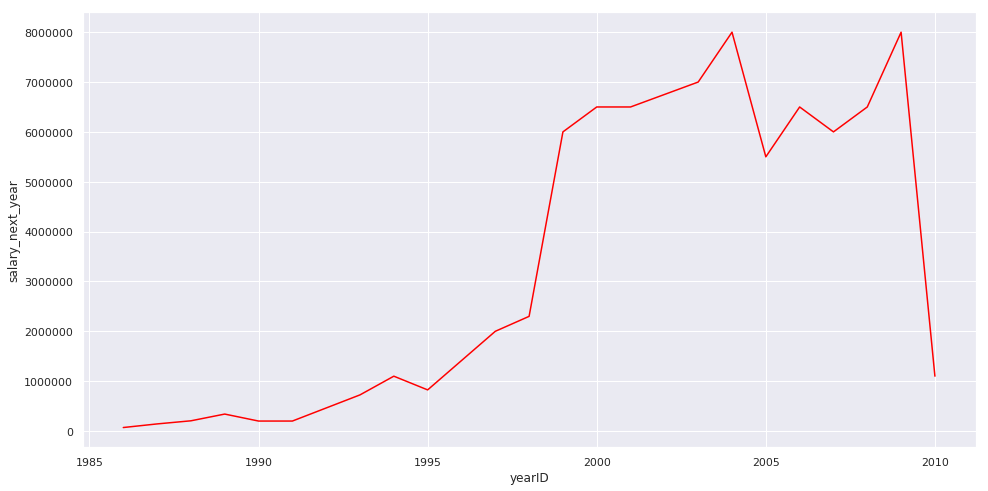

In [292]:
f, ax = plt.subplots(figsize=(16, 8)) #會發現年資整體是 隨年資成長, 但最後一年會大幅下降
sns.lineplot(x='yearID', y='salary_next_year', data=moyerja01,color = 'red') #可發現從1995年以後薪資是一路成長, 且可以用五年用一個單位

In [293]:
train_data.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,salary_next_year
0,nelsoge01,1986,1,CHA,AL,6,6,54,1,0,...,3.000,3.000,0.000,488.000,26.000,52,nan,nan,nan,365000.000
1,moyerja01,1997,1,SEA,AL,17,5,30,30,2,...,3.000,7.000,0.000,787.000,0.000,82,nan,nan,nan,2000000.000
2,thompbr01,2008,1,SLN,NL,6,3,26,6,0,...,2.000,3.000,0.000,273.000,10.000,38,nan,nan,nan,650000.000
3,powerte01,1986,1,CIN,NL,10,6,56,10,0,...,5.000,1.000,1.000,537.000,30.000,59,nan,nan,nan,500000.000
4,osunaan01,2003,1,NYA,AL,2,5,48,0,0,...,3.000,2.000,0.000,232.000,16.000,22,nan,nan,nan,750000.000


### 看playerID 平均薪資、續約次數的關係

In [294]:
'''train_data['salary_mean'] = train_data.groupby('playerID')['salary_next_year'].transform(lambda i :i.mean())
train_data['salary_max'] = train_data.groupby('playerID')['salary_next_year'].transform(lambda i :i.max())
train_data['salary_min'] = train_data.groupby('playerID')['salary_next_year'].transform(lambda i :i.min())
train_data['salary_std'] = train_data.groupby('playerID')['salary_next_year'].transform(lambda i :i.std())

salary_mean = train_data.groupby('playerID')[['playerID','salary_mean']].apply(lambda i : i).drop_duplicates()
salary_max = train_data.groupby('playerID')[['playerID','salary_max']].apply(lambda i : i).drop_duplicates()
salary_min = train_data.groupby('playerID')[['playerID','salary_min']].apply(lambda i : i).drop_duplicates()
salary_std = train_data.groupby('playerID')[['playerID','salary_std']].apply(lambda i : i).drop_duplicates()

test_data['salary_mean'] = test_data['playerID'].map(dict(salary_mean.values))
test_data['salary_max'] = test_data['playerID'].map(dict(salary_max.values))
test_data['salary_min'] = test_data['playerID'].map(dict(salary_min.values))
test_data['salary_std'] = test_data['playerID'].map(dict(salary_std.values))

salary_diff = train_data.groupby('playerID')[['playerID','salary_diff']].apply(lambda i : i).drop_duplicates()
test_data['salary_diff'] = test_data['playerID'].map(dict(salary_diff.values))
'''

"train_data['salary_mean'] = train_data.groupby('playerID')['salary_next_year'].transform(lambda i :i.mean())\ntrain_data['salary_max'] = train_data.groupby('playerID')['salary_next_year'].transform(lambda i :i.max())\ntrain_data['salary_min'] = train_data.groupby('playerID')['salary_next_year'].transform(lambda i :i.min())\ntrain_data['salary_std'] = train_data.groupby('playerID')['salary_next_year'].transform(lambda i :i.std())\n\nsalary_mean = train_data.groupby('playerID')[['playerID','salary_mean']].apply(lambda i : i).drop_duplicates()\nsalary_max = train_data.groupby('playerID')[['playerID','salary_max']].apply(lambda i : i).drop_duplicates()\nsalary_min = train_data.groupby('playerID')[['playerID','salary_min']].apply(lambda i : i).drop_duplicates()\nsalary_std = train_data.groupby('playerID')[['playerID','salary_std']].apply(lambda i : i).drop_duplicates()\n\ntest_data['salary_mean'] = test_data['playerID'].map(dict(salary_mean.values))\ntest_data['salary_max'] = test_data['pl

### 結合資料

In [295]:
ntrain = train_data.shape[0] 
ntest = test_data.shape[0] #方便之後 訓練時資料切割
target = train_data.salary_next_year.values

all_data = pd.concat([train_data,test_data], ignore_index=True)

print("全部數據集的維度",all_data.shape)

全部數據集的維度 (7393, 31)


## 看是否為冠軍隊伍

In [296]:
champion = pd.read_csv('champion.csv')

In [297]:
all_data.columns

Index(['BAOpp', 'BB', 'BFP', 'BK', 'CG', 'ER', 'ERA', 'G', 'GF', 'GIDP', 'GS',
       'H', 'HBP', 'HR', 'IBB', 'IPouts', 'L', 'R', 'SF', 'SH', 'SHO', 'SO',
       'SV', 'W', 'WP', 'lgID', 'playerID', 'salary_next_year', 'stint',
       'teamID', 'yearID'],
      dtype='object')

In [298]:
train_data = train_data.merge(champion, how='left', on=['teamID','yearID'])

In [299]:
train_data['Champion'] = train_data['Champion'].fillna(0) + 1

In [300]:
train_data.groupby('Champion')['salary_next_year'].describe()

,count,mean,std,min,25%,50%,75%,max
Champion,,,,,,,,
1.000,6055.000,2127281.767,2965279.621,60000.000,350000.000,850000.000,2750000.000,24285714.000
2.000,167.000,2773618.760,3605730.351,115000.000,453580.000,1325000.000,3748812.500,24285714.000
3.000,35.000,2584209.571,2948489.305,115000.000,568500.000,1191667.000,4000000.000,12000000.000
4.000,16.000,3069217.750,3073701.962,112000.000,1075000.000,2087500.000,3237500.250,10300000.000
5.000,11.000,4565077.273,4488384.241,223350.000,547500.000,2600000.000,9475000.000,11000000.000


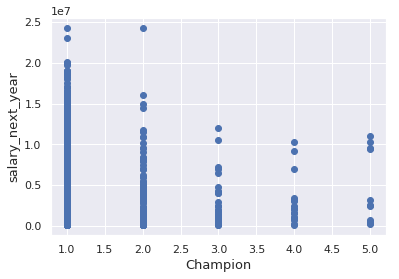

In [301]:
fig, ax = plt.subplots()
ax.scatter(x = train_data['Champion'], y = train_data['salary_next_year'])
plt.ylabel('salary_next_year', fontsize = 13)
plt.xlabel('Champion', fontsize = 13)
plt.show()

# 用薪資去看

In [302]:
train_data['salary_next_year'].describe()

count       6284.000
mean     2153669.017
std      2990284.701
min        60000.000
25%       350000.000
50%       875000.000
75%      2788541.500
max     24285714.000
Name: salary_next_year, dtype: float64

## 如果你在當年度 薪資為75%以上你就是明星球員

In [ ]:
train_data.groupby('yearID')['salary_next_year'].apply(lambda x:)

In [309]:
train_data[train_data['salary_next_year'] == 24285714.000]

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,BK,BFP,GF,R,SH,SF,GIDP,salary_next_year,Champion,Seniority
1007,sabatcc01,2009,1,NYA,AL,19,8,34,34,2,...,0.000,938.000,0.000,96,nan,nan,nan,24285714.000,2.000,8
4158,sabatcc01,2010,1,NYA,AL,21,7,34,34,2,...,1.000,970.000,0.000,92,nan,nan,nan,24285714.000,1.000,9


# 每個球隊的平均薪資

In [312]:
train_data.groupby('teamID')['salary_next_year'].describe().sort_values(by = 'mean',ascending = False)

,count,mean,std,min,25%,50%,75%,max
teamID,,,,,,,,
LAA,69.000,4794381.623,4382121.297,403000.000,575000.000,3800000.000,7333333.000,18700000.000
NYA,235.000,3711969.098,4914093.765,68000.000,494750.000,1550000.000,5000000.000,24285714.000
ARI,104.000,3308469.212,3787764.941,212500.000,587500.000,2000000.000,4270833.250,16000000.000
LAN,231.000,2931289.784,3647652.043,72500.000,452000.000,1600000.000,3800000.000,15714286.000
BOS,220.000,2846516.591,3497493.000,109000.000,494000.000,1437500.000,3762500.000,17500000.000
ATL,222.000,2734484.766,3799737.736,65000.000,365750.000,827500.000,3233333.250,15975184.000
NYN,230.000,2668010.048,3256353.539,92500.000,414625.000,1347500.000,3484375.000,18876139.000
CHN,224.000,2630561.737,3551103.332,68000.000,390625.000,1250000.000,3512500.000,19000000.000
MIL,106.000,2452454.094,3064195.469,210000.000,500000.000,1337500.000,2825000.000,13500000.000


In [305]:
train_data['Seniority'] = train_data.groupby('playerID')['yearID'].transform(lambda x: x - x.min()+1)